<a href="https://colab.research.google.com/github/choiboy92/knee_parallax/blob/main/np_stl_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary packages
!pip install numpy-stl
import numpy as np
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

     |████████████████████████████████| 772 kB 4.9 MB/s 
  Created wheel for numpy-stl: filename=numpy_stl-2.16.3-cp37-cp37m-linux_x86_64.whl size=136648 sha256=06ddf1e872179ef122ba68917ec4edae558f06634f19bdd95358a13e110b4ddd
  Stored in directory: /root/.cache/pip/wheels/06/f4/db/7fac39962a6ba79b7e740892042332083924bff552d4bef41e
Successfully built numpy-stl


exception (0, "Cannot read normals (2:b'#1\\xbf')")


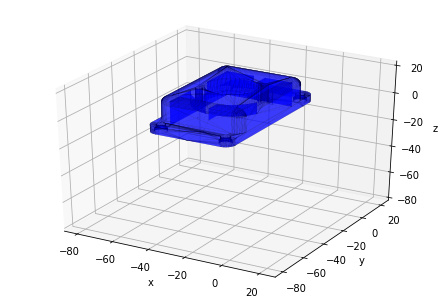

In [11]:
# Create a new plot
fig = plt.figure()
ax = mplot3d.Axes3D(fig)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('Dad Connector.STL')
your_mesh.rotate(axis=[1, 0, 0], theta=math.radians(-90))  #define vector for axis of rotation
your_mesh.rotate(axis=[0, 0, 2], theta=math.radians(90))

collection = mplot3d.art3d.Poly3DCollection(your_mesh.vectors, closed=True, alpha=0.5, linewidth=0.1, facecolor="blue", edgecolor="black")
ax.add_collection3d(collection)

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
ax.auto_scale_xyz(scale, scale, scale)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Show the plot to the screen
plt.show()

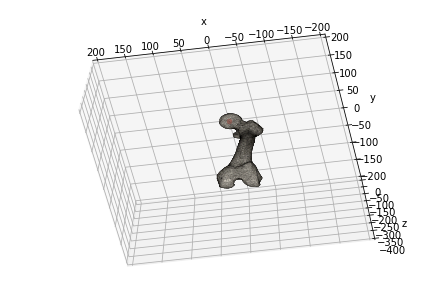

In [79]:
fig = plt.figure()
ax = mplot3d.Axes3D(fig)

# Load the STL files and add the vectors to the plot
femur_mesh = mesh.Mesh.from_file('femur_left.stl')
femur_mesh.translate([-170, -225, 50])
femur_mesh.rotate(axis=[1, 0, 0], theta=math.radians(0))  #define vector for axis of rotation
femur_mesh.rotate(axis=[0, 0, 1], theta=math.radians(180))
#femur_mesh.translate([0, 200, 0])

ax.scatter(0,0,0, c="red")

collection = mplot3d.art3d.Poly3DCollection(femur_mesh.vectors, closed=True, alpha=0.5, linewidth=0.1, facecolor="#e3dac9", edgecolor="black")
ax.add_collection3d(collection)

# Auto scale to the mesh size
#scale = femur_mesh.points.flatten()
#ax.auto_scale_xyz(scale, scale, scale)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#ax.view_init(elev=0., azim=90)
ax.view_init(elev=-70., azim=100)
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(-400, 0)

# Show the plot to the screen
plt.show()

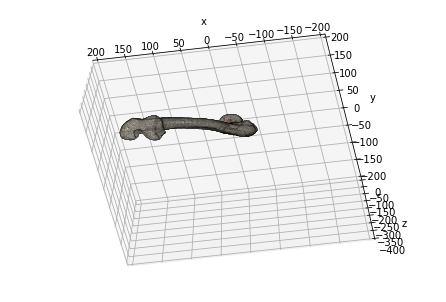

In [78]:
def hip_femur_matrix(angle_val):
  flexion = angle_val[0]*np.pi/180
  var_val = angle_val[1]*np.pi/180
  int_ext = angle_val[2]*np.pi/180
  Rx = np.array([[1, 0, 0],
                [0, np.cos(flexion), -np.sin(flexion)],
                [0, np.sin(flexion), np.cos(flexion)]])
  Ry = np.array([[np.cos(var_val), 0, np.sin(var_val)],
                [0, 1, 0],
                [-np.sin(var_val), 0, np.cos(var_val)]])
  Rz = np.array([[np.cos(int_ext), -np.sin(int_ext), 0],
                [np.sin(int_ext), np.cos(int_ext), 0],
                [0, 0, 1]])
  R = Rx.dot(Ry).dot(Rz)
  return R

fig = plt.figure()
ax = mplot3d.Axes3D(fig)

femur_mesh.rotate_using_matrix(hip_femur_matrix([0,0,0]).T)

ax.scatter(0,0,0, c="red")

collection = mplot3d.art3d.Poly3DCollection(femur_mesh.vectors, closed=True, alpha=0.5, linewidth=0.1, facecolor="#e3dac9", edgecolor="black")
ax.add_collection3d(collection)

# Auto scale to the mesh size
#scale = femur_mesh.points.flatten()
#ax.auto_scale_xyz(scale, scale, scale)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#ax.view_init(elev=0., azim=90)
ax.view_init(elev=-70., azim=100)
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(-400, 0)

# Show the plot to the screen
plt.show()

In [31]:
import plotly.graph_objects as go

def stl2mesh3d(stl_mesh):
    # stl_mesh is read by nympy-stl from a stl file; it is  an array of faces/triangles (i.e. three 3d points) 
    # this function extracts the unique vertices and the lists I, J, K to define a Plotly mesh3d
    p, q, r = stl_mesh.vectors.shape #(p, 3, 3)
    # the array stl_mesh.vectors.reshape(p*q, r) can contain multiple copies of the same vertex;
    # extract unique vertices from all mesh triangles
    vertices, ixr = np.unique(stl_mesh.vectors.reshape(p*q, r), return_inverse=True, axis=0)
    I = np.take(ixr, [3*k for k in range(p)])
    J = np.take(ixr, [3*k+1 for k in range(p)])
    K = np.take(ixr, [3*k+2 for k in range(p)])
    return vertices, I, J, K

print(femur_mesh.vectors.shape)

vertices, I, J, K = stl2mesh3d(femur_mesh)
x, y, z = vertices.T

print(vertices.shape)

colorscale= [[0, '#e5dee5'], [1, '#e5dee5']]

mesh3D = go.Mesh3d(
            x=x,
            y=y,
            z=z, 
            i=I, 
            j=J, 
            k=K, 
            flatshading=True,
            colorscale=colorscale, 
            intensity=z, 
            name='Femur Left',
            showscale=False)


fig = go.Figure(data=[mesh3D])

fig.data[0].update(lighting=dict(ambient= 0.18,
                                 diffuse= 1,
                                 fresnel=  .1,
                                 specular= 1,
                                 roughness= .1,
                                 facenormalsepsilon=0))
fig.data[0].update(lightposition=dict(x=3000,
                                      y=3000,
                                      z=10000));
fig.show()                                      

(33990, 3, 3)
(16997, 3)
